# Processing supreme data

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.transform import warp, warp_polar
import supreme as sp

#awojdyla@lbl.gov
#October 2020

In [2]:
filename = "01_test.tiff"

# read the image
im_tiff = Image.open(filename)
# make the image a numpy array so that we can process it
im_np = np.squeeze(np.array(im_tiff.getdata()).reshape(im_tiff.size[0], im_tiff.size[1], 1))

# pixel size
dx_m = 1e-6
# screen size
Dx_m = 2e-3-dx_m

In [3]:
# take the Fourier Transform
IMG = sp.ft(im_np)

# removing zero frequencies (tend to dominate the signal), but just for display
IMG_d = IMG
IMG_d[498:503,:]=np.mean(abs(IMG))
IMG_d[:,498:503]=np.mean(abs(IMG))

x_m = np.linspace(-Dx_m/2, Dx_m/2, int(np.ceil(Dx_m/dx_m)))
# corresponding frequency scale
f_cpm = sp.fs(x_m)

In [4]:
np.shape(warp_polar(np.abs(IMG)**2))

(360, 1414)

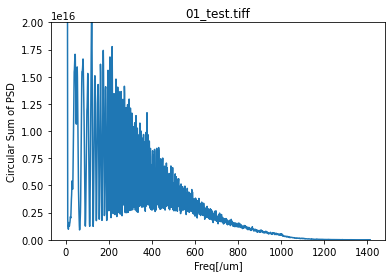

In [5]:
CIRCSUM = np.sum(warp_polar(np.abs(IMG)**2), 0)
#plt.plot(f_cpm[501:]*1e-6,CIRCSUM[0:500])
plt.plot(CIRCSUM)
plt.title(filename)
plt.xlabel('Freq[/um]')
plt.ylabel('Circular Sum of PSD')
plt.ylim((0,20000e12))
plt.show()

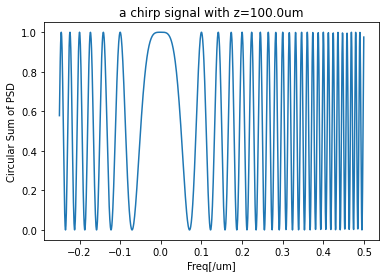

In [6]:
# Chirp model:

x = f_cpm[500:] # Setting the frequency scale axis of the chirp to match that of the signal.
chirp = lambda z_m, lambda_m, f_cpm: abs(np.cos(np.pi*z_m*lambda_m*f_cpm**2))**2 # Equation of chirp, which is used here to fit the signal!

z_m = 100e-6
lambda_m = 1e-6

plt.plot(f_cpm[500:] * 1e-6,chirp(z_m,lambda_m,f_cpm[500:]))
plt.xlabel('Freq[/um]')
plt.ylabel('Circular Sum of PSD')
plt.title('a chirp signal with z=%1.1fum'%(z_m*1e6))
plt.show() 